In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.set_index("RowNumber",inplace=True)

In [5]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# data cleaning

In [6]:
df.drop(["CustomerId","Surname"],axis=1,inplace=True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
df.Geography=df.Geography.map({'France':1,'Germany':2,'Spain':3})

In [11]:
df.Gender=df.Gender.map({'Female':1,'Male':2})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 937.5 KB


In [13]:
df.isnull().sum().sum()

0

# Scaling

In [14]:
cols_to_scale = ['CreditScore','Age','Balance',"Tenure","NumOfProducts","EstimatedSalary"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Spliting

In [15]:
X = df.drop('Exited',axis='columns')
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
len(X_train.columns)

10

In [16]:
from sklearn.preprocessing import StandardScaler

def scale_datasets(x_train, x_test):
    """
    Standard Scale test and train data
    Z - Score normalization
    """
    standard_scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(
        standard_scaler.fit_transform(x_train),
        columns=x_train.columns
    )
    x_test_scaled = pd.DataFrame(
        standard_scaler.transform(x_test),
        columns = x_test.columns
    )
    return x_train_scaled, x_test_scaled
  
# scale the dataset
X_train, X_test = scale_datasets(X_train, X_test)

## with keras tuner

In [17]:
import tensorflow
from tensorflow.keras.layers import Dense,Dropout
import keras_tuner as kt
from tensorflow.keras.models import Sequential

In [18]:
def Model(hp):
    model=Sequential()
    model.add(Dense(
        units=hp.Int("neurons_0",min_value=32,max_value=128,step=16),
        activation="relu",
        input_shape=(10,)
    ))
    
    for i in range(hp.Int("number of hidden layers",min_value=2,max_value=20)):
        model.add(Dense(
            units=hp.Int("neurons_"+str(i+1),min_value=32,max_value=128,step=16),
            activation="relu"))
        model.add(Dropout(.2))
        
    model.add(Dense(1,activation="sigmoid"))
    
    model.compile(optimizer="Adam",loss="BinaryCrossentropy",metrics=['accuracy'])
    return model

In [19]:
tuner=kt.RandomSearch(Model,objective="val_accuracy",max_trials=5)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [20]:
tuner.search(X_train, y_train, epochs=10, validation_split=(X_test,y_test))

INFO:tensorflow:Oracle triggered exit


In [21]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
neurons_0: 64
number of hidden layers: 2
neurons_1: 64
neurons_2: 112
neurons_3: 96
neurons_4: 128
neurons_5: 48
neurons_6: 64
neurons_7: 128
neurons_8: 80
neurons_9: 32
neurons_10: 80
neurons_11: 96
Score: 0.8787500262260437
Trial summary
Hyperparameters:
neurons_0: 128
number of hidden layers: 10
neurons_1: 48
neurons_2: 96
neurons_3: 48
neurons_4: 80
neurons_5: 128
neurons_6: 48
neurons_7: 64
neurons_8: 112
neurons_9: 80
neurons_10: 32
neurons_11: 80
Score: 0.878125011920929
Trial summary
Hyperparameters:
neurons_0: 128
number of hidden layers: 5
neurons_1: 80
neurons_2: 80
neurons_3: 64
neurons_4: 112
neurons_5: 112
neurons_6: 96
neurons_7: 96
neurons_8: 96
neurons_9: 48
neurons_10: 112
neurons_11: 64
Score: 0.8743749856948853
Trial summary
Hyperparameters:
neurons_0: 112
number of hidden layers: 12
neurons_1: 96
neurons_2: 64
neurons_3

In [22]:
model=Sequential()
model.add(Dense(
    units=64,
    activation="relu",
    input_shape=(10,)))

model.add(Dense(units=64,activation="relu"))
model.add(Dropout(.2))
model.add(Dense(units=112,activation="relu"))
model.add(Dropout(.2))
model.add(Dense(units=96,activation="relu"))
model.add(Dropout(.2))
model.add(Dense(units=128,activation="relu"))
model.add(Dropout(.2))
model.add(Dense(units=48,activation="relu"))
model.add(Dropout(.2))
model.add(Dense(units=64,activation="relu"))
model.add(Dropout(.2))
model.add(Dense(units=128,activation="relu"))
model.add(Dropout(.2))
model.add(Dense(units=80,activation="relu"))
model.add(Dropout(.2))
model.add(Dense(units=32,activation="relu"))
model.add(Dropout(.2))
model.add(Dense(units=80,activation="relu"))
model.add(Dropout(.2))
model.add(Dense(units=96,activation="relu"))
model.add(Dropout(.2))
        
model.add(Dense(1,activation="sigmoid"))
    
model.compile(optimizer="Adam",loss="BinaryCrossentropy",metrics=['accuracy'])

In [23]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.4747 - accuracy: 0.7943
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4252 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3989 - accuracy: 0.8324
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3922 - accuracy: 0.8428
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3820 - accuracy: 0.8470
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3713 - accuracy: 0.8543
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3657 - accuracy: 0.8506
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3571 - accuracy: 0.8543
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3513 - accuracy: 0.8576
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3462 - accura

250/250 [==============================] - 1s 3ms/step - loss: 0.2430 - accuracy: 0.8976
Epoch 82/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2446 - accuracy: 0.8989
Epoch 83/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2432 - accuracy: 0.8971
Epoch 84/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2396 - accuracy: 0.8979
Epoch 85/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2391 - accuracy: 0.8964
Epoch 86/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2457 - accuracy: 0.8985
Epoch 87/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2363 - accuracy: 0.8957
Epoch 88/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2385 - accuracy: 0.8985
Epoch 89/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2295 - accuracy: 0.9003
Epoch 90/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2451 - accuracy: 

In [24]:
yp = model.predict(X_test)
yp[:5]

array([[3.6593139e-02],
       [4.5708239e-02],
       [2.3690340e-07],
       [1.2954301e-01],
       [4.4425756e-02]], dtype=float32)

In [25]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [26]:
from sklearn.metrics import confusion_matrix,classification_report

In [27]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

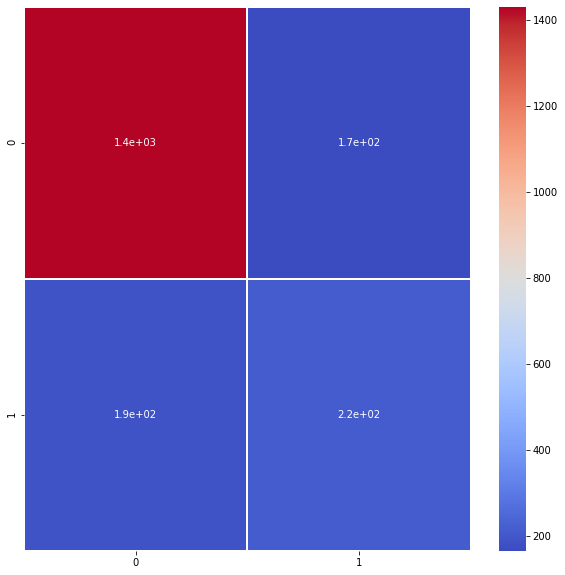

In [28]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(10,10)
sns.heatmap(cm,annot=True,cmap="coolwarm",linewidths=2)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1595
           1       0.56      0.53      0.55       405

    accuracy                           0.82      2000
   macro avg       0.72      0.71      0.72      2000
weighted avg       0.82      0.82      0.82      2000



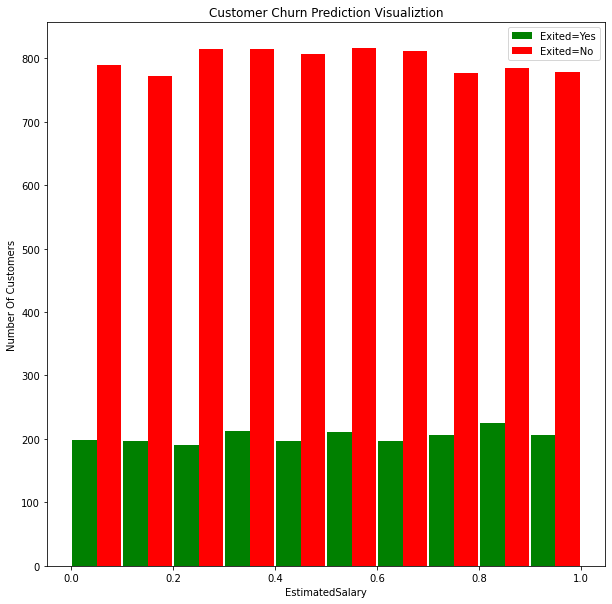

In [30]:
mc_churn_no = df[df.Exited==0].EstimatedSalary      
mc_churn_yes = df[df.Exited==1].EstimatedSalary      

plt.xlabel("EstimatedSalary")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()